Профессия Data Science  
Блок 4. Введение в машинное обучение  
**ML-3. Обучение с учителем: классификация**

---

## **✍ Оглавление:**

2. Логистическая регрессия
3. Метрики классификации. Преимущества и недостатки логистической регрессии

---

## **2. Логистическая регрессия**

**Задача классификации (classification)** — задача, в которой мы пытаемся предсказать класс объекта на основе признаков в наборе данных. То есть задача сводится к предсказанию целевого признака, который является **категориальным**.

Когда классов, которые мы хотим предсказать, только два, классификация называется **бинарной**.

Когда классов, которые мы хотим предсказать, более двух, классификация называется **мультиклассовой (многоклассовой)**.

Что вообще означает «решить задачу классификации»? Это значит построить разделяющую поверхность в пространстве признаков, которая делит пространство на части, каждая из которых соответствует определённому классу. 

Модели, которые решают задачу классификации, называются **классификаторами (classifier)**.

**<center> ОБЩЕЕ ПРЕДСТАВЛЕНИЕ О ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ </center>**

**Логистическая регрессия (Logistic Regression)** — одна из простейших моделей для решения задачи классификации. Несмотря на простоту, модель входит в топ часто используемых алгоритмов классификации в Data Science.

В основе логистической регрессии лежит логистическая функция (logistic function)  — отсюда и название модели. Однако более распространённое название этой функции — **сигмόида (sigmoid)**.

**В чём преимущество этой функции?**
У сигмоиды есть два очень важных для нас свойства:

➔ Значения сигмоиды σ(𝑧) лежат в диапазоне от 0 до 1 при любых значениях
аргумента 𝑧. Какой бы 𝑧 вы ни подставили, число меньше 0 или больше 1
вы не получите.
➔ Сигмоида выдаёт значения σ(𝑧) > 0. 5 при её аргументе 𝑧 > 0, σ(𝑧) < 0. 5,
при 𝑧 < 0 и σ(𝑧) = 0. 5 при 𝑧 = 0.

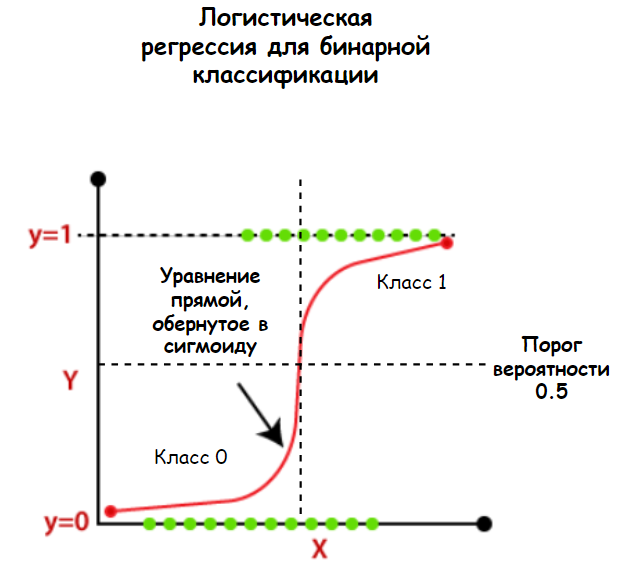

## **3. Метрики классификации. Преимущества и недостатки логистической регрессии**

